#### Importando bibliotecas

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

In [1]:
import  warnings 
warnings.simplefilter('ignore')

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
# Função para plotar o ACF E PACF
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

#### Modelo Autoregressivos - AR(p)
$x_t= \phi_1x_{t-1 }+ \phi_2x_{t-2}+\cdot\cdot\cdot+\phi_px_{t-p}+z_t$ 

**Importante**:
$e_t$ = ruído branco ~ N(0,1)

##### Modelo AR(1)
$x_t= \phi_1x_{t-1 }+z_t$ 

##### Modelo AR(2)
$x_t= \phi_1x_{t-1 }+\phi_2x_{t-2}+z_t$ 

##### **Simulando um processo AR(1)**
$x_t= -0.8x_{t-1 }+z_t$

##### StatsModels - ArmaProcess

* **ar**: array_like; Coefficient for autoregressive lag polynomial, including zero lag. Must be entered using the signs from the lag polynomial representation. See the notes for more information about the sign.

* **ma**: array_like; Coefficient for moving-average lag polynomial, including zero lag.

* **nobs**: int:, optional; Length of simulated time series. Used, for example, if a sample is generated. See example.


**Notes**: Both the AR and MA components must include the coefficient on the zero-lag. In almost all cases these values should be 1. Further, due to using the lag-polynomial representation, the AR parameters should have the opposite sign of what one would write in the ARMA representation. See the examples below.

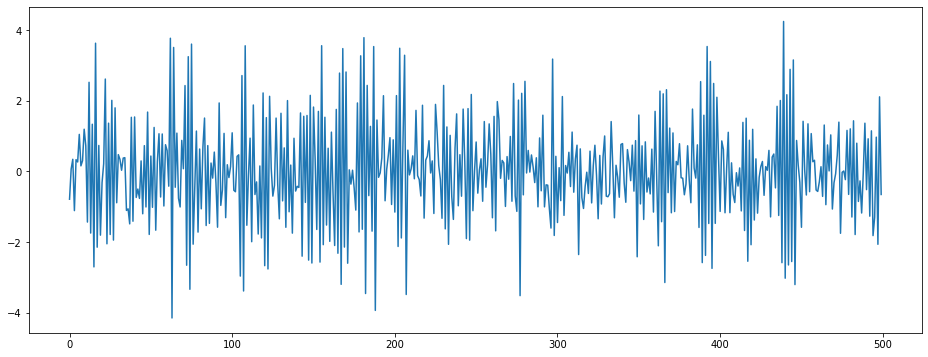

In [44]:
from statsmodels.tsa.arima_process import ArmaProcess

ar1 = np.array([1, 0.8])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
rs_ar1 = AR_object1.generate_sample(nsample=500)

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(rs_ar1);

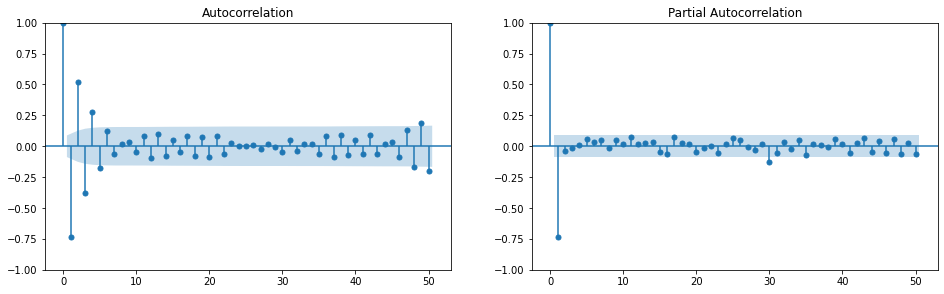

In [46]:
acf_pacf(rs_ar1, 50)

Para um AR(1) em que $\phi_1$ é negativo, as correlações vão decaindo até 0 de acordo com o aumento do lag, porém existe uma alteração entre os sinais dos valores

##### **Simulando um processo AR(1)**
$x_t = 0.8x_{t-1 }+z_t$

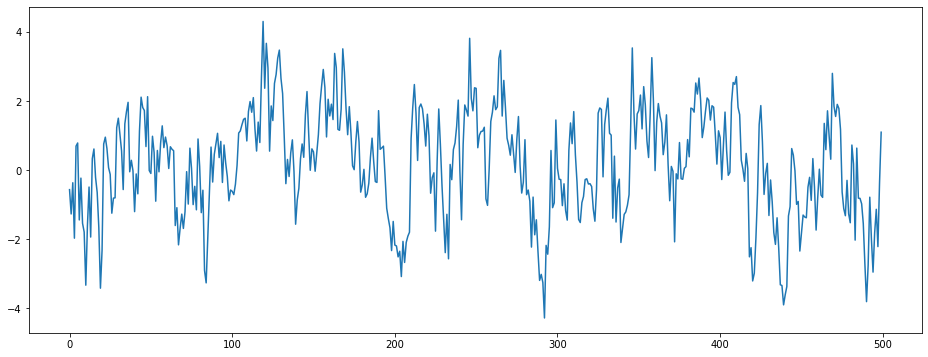

In [49]:
ar1 = np.array([1, -0.8])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
rs_ar1 = AR_object1.generate_sample(nsample=500)

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(rs_ar1);

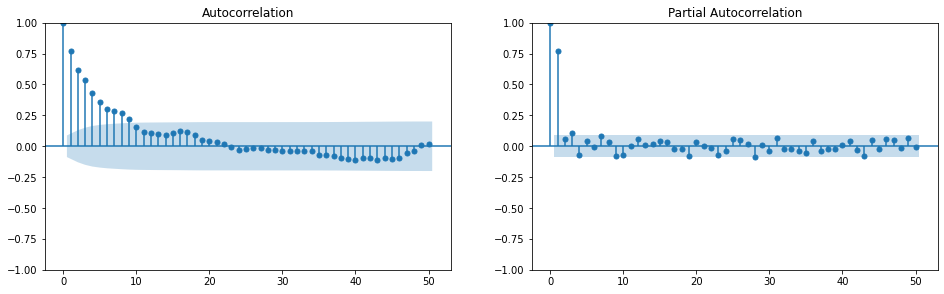

In [50]:
acf_pacf(rs_ar1, 50)

Para um AR(1) em que $\phi_1$ é positivo, as correlações vão decaindo até 0 de acordo com o aumento do lag.

##### Simulando um processo AR(2)
$x_t= -0.3x_{t-1 }+0.5x_{t-2}+z_t$ 

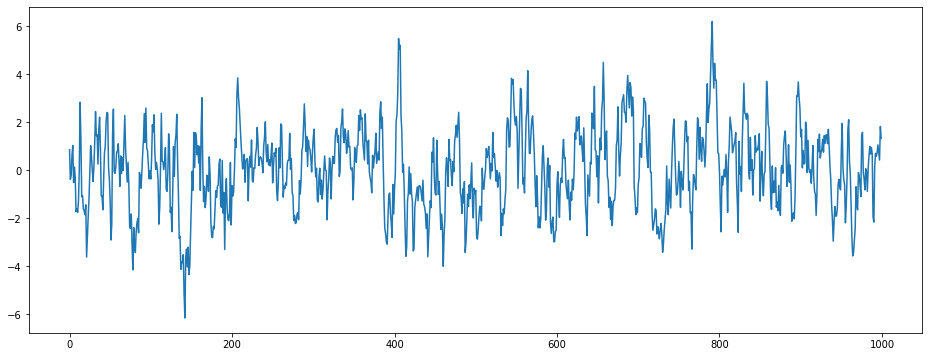

In [52]:
ar2 = np.array([1, 0.3, -0.5])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
rs_ar2 = AR_object1.generate_sample(nsample=1000)

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(rs_ar2);

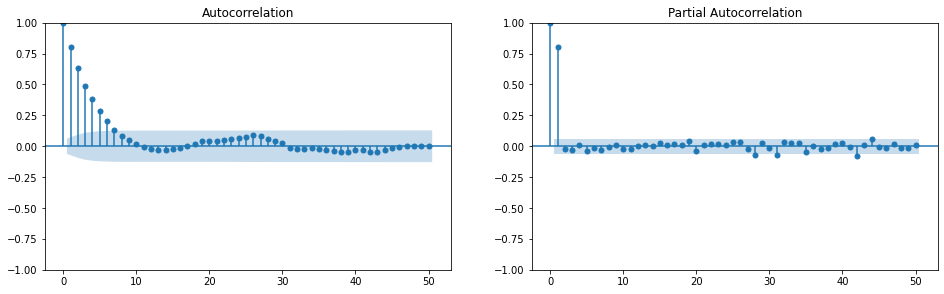

In [53]:
acf_pacf(rs_ar2, 50)

#### Modelo de Médias Móveis MA(q) 
$x_t=z_t+\theta_1z_{t-1}+\theta_2z_{t-2}+\cdot\cdot\cdot+\theta_qz_{t-q}$

##### Modelo MA(1)
$x_t= z_t+\theta_1z_{t-1}$ 

##### Modelo MA(2)
$x_t= z_t+\theta_1Z_{t-1 }+\theta_2Z_{t-2}$ 

##### **Simulando um processo MA(1)**
$x_t=-0.8z_{t-1}$ 

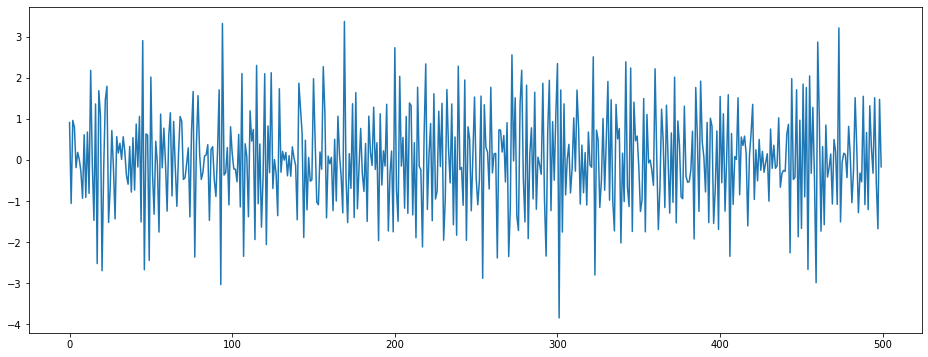

In [59]:
ar1 = np.array([1])
ma1 = np.array([1, -0.8])
AR_object2 = ArmaProcess(ar1, ma1)
rs_ma1 = AR_object2.generate_sample(nsample=500)

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(rs_ma1)
plt.show()

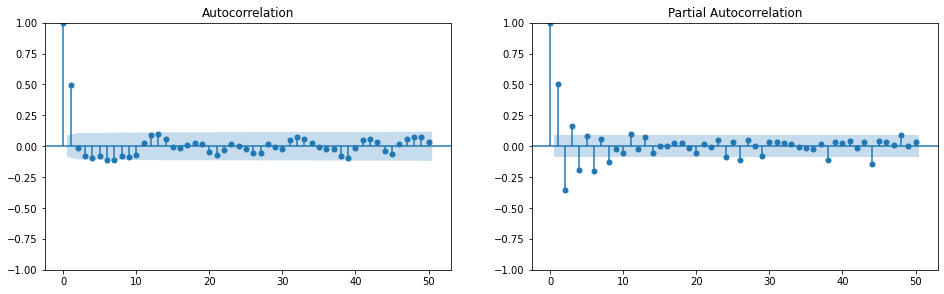

In [58]:
acf_pacf(rs_ma1, 50)

#### Model Autoregressivo e de Médias Móveis ARMA(p,q) 
$x_t= \phi_1x_{t-1 }+ \phi_2x_{t-2}+\cdots+\phi_px_{t-p}+z_t+\theta_1z_{t-1}+\theta_2z_{t-2}+\cdots+\theta_qz_{t-q}$ 

$x_t= \phi_1x_{t-1 }+\cdots+\phi_px_{t-p}+z_t+\theta_1z_{t-1}+\cdot\cdot\cdot+\theta_qz_{t-q}$ 

$x_t-\phi_1x_{t-1 }-\cdots-\phi_px_{t-p}= +z_t+\theta_1z_{t-1}+\cdot\cdot\cdot+\theta_qz_{t-q}$ 

**Lag-polynomial representation**: 

$(1-\phi_1L-\cdots-\phi_pL^p)x_t=(1+\theta_1L+\cdots+\theta_qL^q)$

##### **Simulando um processo ARMA(1,2)**
Suponha os parâmetros: 

$\phi_1=0.5; \theta_1=0.2; \theta_2=0.7$

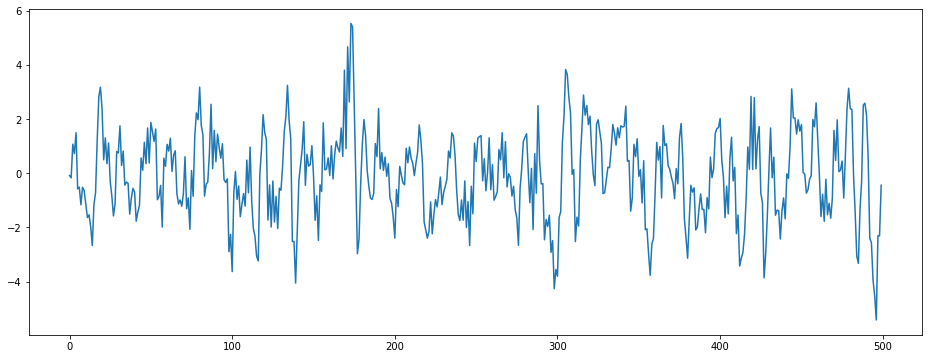

In [67]:
ar1 = np.array([1, -0.5])
ma1 = np.array([1, 0.2, 0.7])
AR_object2 = ArmaProcess(ar1, ma1)
rs_arma1 = AR_object2.generate_sample(nsample=500)

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(rs_arma1)
plt.show()

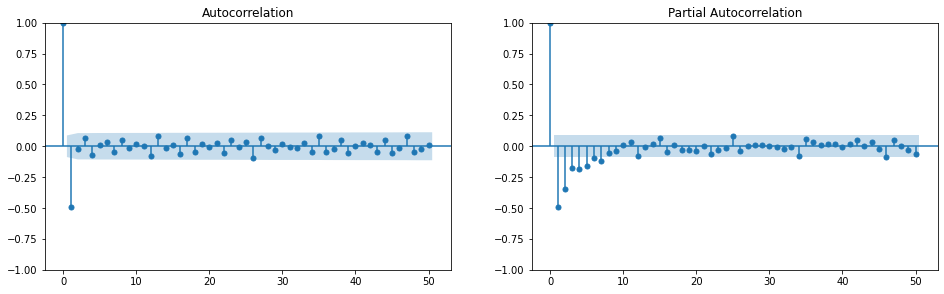

In [66]:
acf_pacf(rs_ma1, 50)

**Exercício 02:**

Simule os seguintes os seguintes processos AR, MA e ARMA e gera as funções ACF e PCAF

**a)** AR(1): $x_t = 0.5x_{t-1}+z_t$

**b)** MA(1): $x_t=-0.7z_{t-1}$

**c)** ARMA(1,1): $\phi_1=0.3; \theta_1=0.2$

